# Лабораторная работа №5.4.2
# По теме: "Измерение коэффициента ослабления потока $\gamma$-лучей в веществе и определение их энергии"

### Выполнял: Дмитрий Дроздов Б01-908
---

***Цель работы:***

С помощью сцинтилляционного счетчика измерить линейный коэффициент ослабления $\gamma$-лучей в сыинце, железе, алюминии и дереве. По их величинам определить энергию $\gamma$-кванта

***Теоретическое введение:***


Гамма-лучи возникают при переходе возбужденных ядер из одного энергетического состояния в другое, более низкое. Энергия $\gamma$-квантов обычно заключена между несколькими десятками килоэлектронвольт и несколькими миллионами электрон-вольт. Гамма-кванты не несут электрического заряда, их масса равна нулю. Проходя, через вещество, пучок $\gamma$-квантов постепенно ослабляется. Ослабление просходит по експоненциальному закону, который может быть записан в следующей форме:

$$
		I = I_0 e^{-\mu l},
$$

,где $I$, $I_0$ -- интенсивности прошедшего и падающего излучений; $l$ -- длина пути, пройденного пучком $\gamma$-лучей; $\mu$ -- коэффициент ослабления потока в веществе.
	
Ослабление потока $\gamma$-лучей, происходящее при прохождении среды, связано с тремя эффектами: фотоэлектрическим поглощением, комптоновским рассеянием и с генерацией электрон-позитронных пар.
	
В случае опытов, поставленных в хорошей геометрии, при прохождении $\gamma$-лучей через вещество меняет только количество, но не энергия $\gamma$-квантов в пучке, так что коэффициент $\mu$, характеризующий поглощение $\gamma$-квантов в веществе, не зависит от длины пути. Обозначим через $-dN$ число $\gamma$-квантов, выбывших их пучка на пути $dl$. Это число пропорционально имеющемуся их числу $N$ и пройденному пути $dl$. Cледовательно,

$$
		-dN = \mu N \, dl.
$$

Интегрируя уравнение от нулевой толщины до заданной, получим

$$
N = N_0 e^{-\mu l}.
$$

Вообще говоря, в плохой геометрии, когда рассеянные под небольшими углами $\gamma$-кванты остаются в пучке, их спектр с прохождением вещества меняется, поэтому формула непреминима. Однако в этом случае она работает лучше, чем можно было ожидать.
	
В данной работе коэффициент ослабления $\mu$ измеряется в хорошей геометрии. Из формулы~(\ref{eq3}) имеем:

$$
		\mu = \frac{1}{l} \ln \frac{N_0}{N}.
$$

Для определения коэффициента ослабления нужно, таким образом, измерить толщтну образца $l$, число падающих частиц $N_0$ и число частиц $N$, прошедших через образец.
	
### Экспериментальная установка
Схема установки



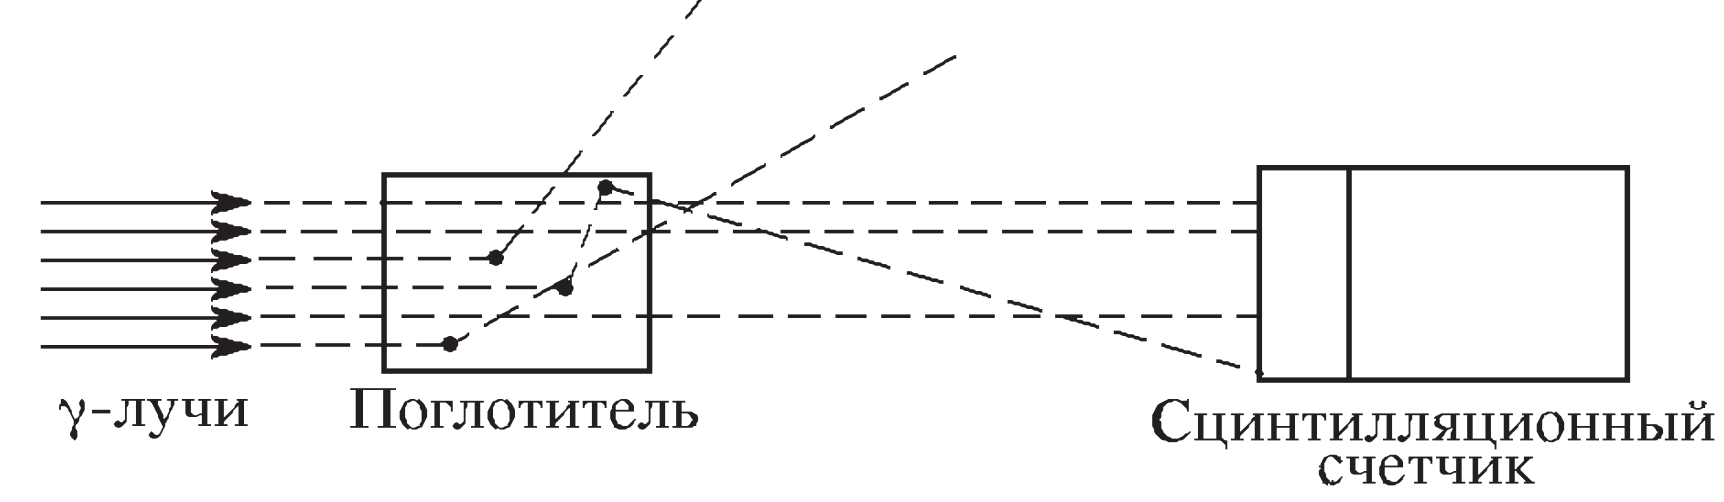



Свинцовый коллиматор выделяет узкий почти параллельный пучок $\gamma$-квантов, проходящий через набор поглотителей П и регистрируемый сцинтиляцонным счетчиком. Сигналы от счетчика усиливаются и регистрируются пересчетным прибором ПП. Высоковольтный выпрямитель ВВ обеспечивает питание сцинтилляционного счетчика.

При недостаточно хорошей геометрии в результаты опытов могут вкрасться существенные погрешности. В реальных установках всегда имеется конечная вероятность того, что $\gamma$-квант провзаимодействует в поглотителе несколько раз до того, как попадет в детектор (пути таких квантов показаны на рис 2. Чтобы уменьшить число таких случаев, в данной работе сцинтилляционный счетчик расположен на большом расстоянии от источиника $\gamma$-квантов, а поглотители имеют небольшие размеры. Их следует устанавливать за коллиматорной щелью на некотором расстоянии друг от друга, чтобы испытавшие комптоновское рассеяние и выбывшие из прямого потока кванты с меньшей вероятностью могли в него вернуться.

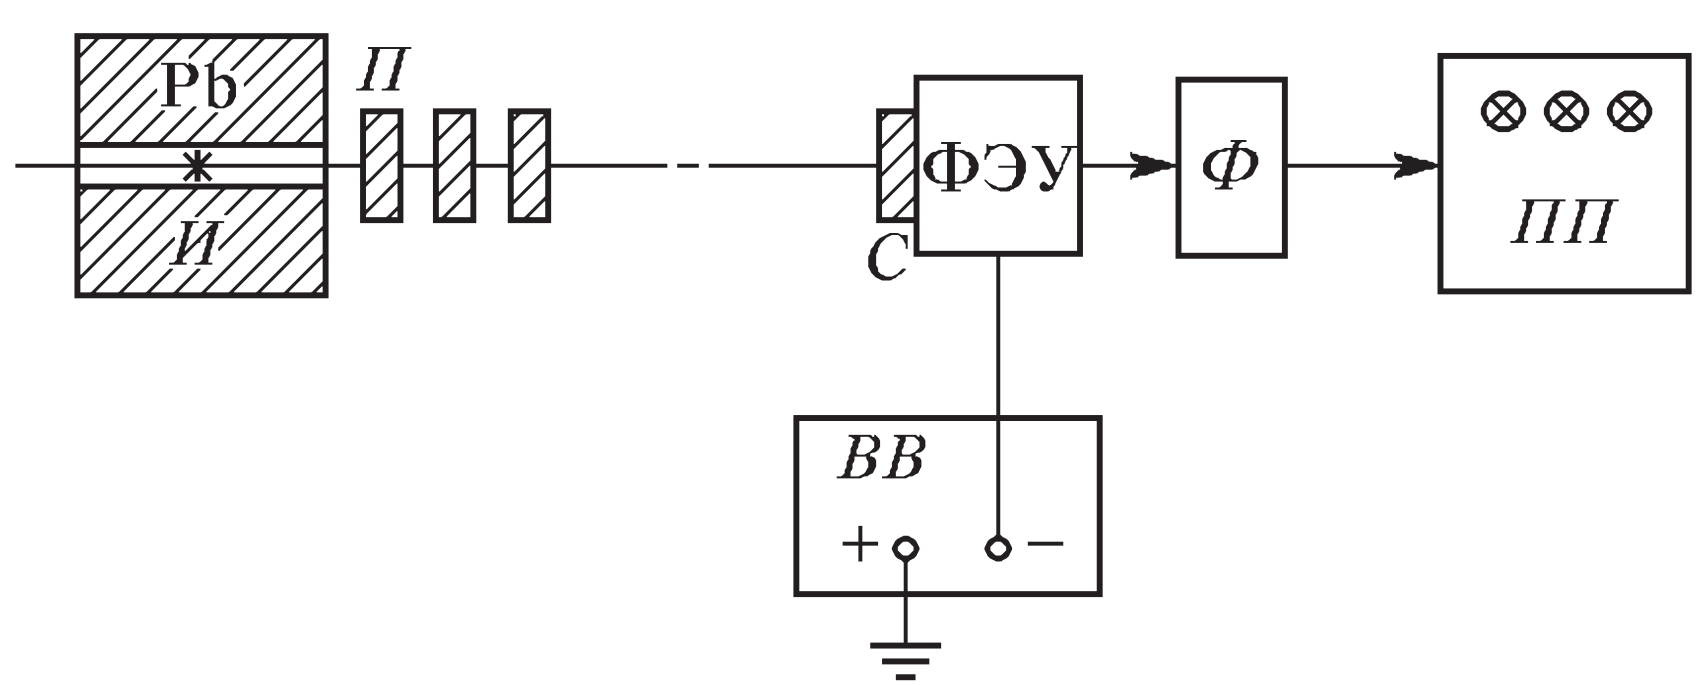

# Выполнение

In [54]:
import pandas as pd
import numpy as np
import os
import scipy.constants as spc
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

font = {'family': 'serif',
'color': 'darkred',
'weight': 'normal',
'size': 16,
}

def mnk( x, y):
    R = np.average([x[i]*y[i] for i in range(len(x))]) - np.average(x) * np.average(y)

    A_coef = R / np.var(x)
    B_coef = np.average(y) - A_coef * np.average(x)

    Delta_a = np.sqrt( 1 / (len( x ) - 2)*(np.var(y)/np.var(x) - A_coef ** 2 ))
    Delta_b = Delta_a * np.sqrt(np.average([z * z for z in x]))

    Eps_a = Delta_a / A_coef
    Eps_b = Delta_b / B_coef
 
    # print(A_coef, B_coef, Delta_a, Delta_b)
    return [ [A_coef, Delta_a, Eps_a], [B_coef, Delta_b, Eps_b] ]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data0 = pd.read_excel('/content/drive/MyDrive/PhysicLabs/5.5.1/5.1.XLSX', na_filter= False, usecols=['без калиматора', 'с калиматором', 'фон'])
dataAl = pd.read_excel('/content/drive/MyDrive/PhysicLabs/5.5.1/5.1.XLSX', na_filter= False, usecols=['Al1', 'Al2', 'Al3', 'Al4', 'Al5', 'Al6', 'Al7', 'Al8'])
dataFe = pd.read_excel('/content/drive/MyDrive/PhysicLabs/5.5.1/5.1.XLSX', na_filter= False, usecols=['Fe1', 'Fe2', 'Fe3', 'Fe4', 'Fe5', 'Fe6', 'Fe7', 'Fe8', 'Fe9', 'Fe10', 'Fe11', 'Fe12'])
dataPr = pd.read_excel('/content/drive/MyDrive/PhysicLabs/5.5.1/5.1.XLSX', na_filter= False, usecols=['Pr1', 'Pr2', 'Pr3', 'Pr4', 'Pr5', 'Pr6', 'Pr7', 'Pr8'])
dataPb = pd.read_excel('/content/drive/MyDrive/PhysicLabs/5.5.1/5.1.XLSX', na_filter= False, usecols=['Pb1', 'Pb2', 'Pb3', 'Pb4', 'Pb5', 'Pb6', 'Pb7', 'Pb8', 'Pb9', 'Pb10', 'Pb11', 'Pb12', 'Pb13', 'Pb14'])

print(data0.to_markdown(index=False))
print("\nАлюминий")
print(dataAl.to_markdown(index=False))
print("\nЖелезо")
print(dataFe.to_markdown(index=False))
print("\nДерево")
print(dataPr.to_markdown(index=False))
print("\nСвинец")
print(dataPb.to_markdown(index=False))

| без калиматора   | с калиматором   |   фон |
|:-----------------|:----------------|------:|
| 123825           | 111             | 112   |
| 114677           | 104             | 107   |
| 110326           | 133             | 150   |
| 103251           | 140             | 126   |
| 103888           | 105             | 107   |
| 101333           |                 | 112.7 |
|                  |                 | 109.5 |

Алюминий
| Al1   | Al2   | Al3   | Al4   | Al5   | Al6   | Al7   | Al8   |
|:------|:------|:------|:------|:------|:------|:------|:------|
| 74310 | 40918 | 25524 | 16399 | 10922 | 7154  | 4680  | 3148  |
| 71049 | 41156 | 25689 | 16781 | 11248 | 6953  | 4723  | 3185  |
| 69135 | 40828 | 26053 | 16766 | 11246 | 7227  | 4783  | 3146  |
|       |       |       |       |       |       |       |       |
|       |       |       |       |       |       |       |       |
|       |       |       |       |       |       |       |       |
|       |       |       |       |      

In [38]:
fon =     120.40
fon_err = 16.35

n0 =      109550.00
n0_err =  7851.95

Al_width = 1.95 #sm
Fer_width = 0.9 #sm
Pb_width = 0.35 #sm
Pr_width = 1.9 #sm

Al_l = np.arange(start=Al_width, step=Al_width, stop=(8 * Al_width + 0.1))
Al_n = np.mean(dataAl.filter(items=[0, 1, 2], axis=0).to_numpy(dtype=float), axis=0) - fon
Al_err =  np.array([2136.41, 138.37, 221.00, 176.65, 153.21, 115.86, 42.24, 17.93])

Fe_l = np.arange(start=Fer_width, step=Fer_width, stop=(13 * Fer_width))
Fe_n = np.mean(dataFe.filter(items=[0, 1, 2], axis=0).to_numpy(dtype=float), axis=0) - fon
Fe_err = np.array([869.71, 172.40, 81.56, 93.05, 31.67, 43.37, 30.30, 26.17, 19.76, 22.65, 17.67, 5.17])

Pr_l = np.arange(start=Pr_width, step=Pr_width, stop=(9 * Pr_width))
Pr_n = np.mean(dataPr.filter(items=[0, 1, 2], axis=0).to_numpy(dtype=float), axis=0) - fon
Pr_err =  np.array([3414.95, 1196.07, 415.09, 442.11, 343.95, 143.10, 264.37, 402.86])

Pb_l = np.arange(start=Pb_width, step=Pb_width, stop=(14 * Pb_width + 0.1))
Pb_n = np.mean(dataPb.filter(items=[0, 1, 2, 3], axis=0).to_numpy(dtype=float), axis=0) - fon
Pb_err =  np.array([367.38, 337.59, 229.63, 79.89, 86.93, 33.70, 81.41, 33.51, 39.57, 17.61, 19.56, 8.29, 25.99, 10.30])

In [39]:
Al_log = np.log(n0/Al_n)
Fe_log = np.log(n0/Fe_n)
Pb_log = np.log(n0/Pb_n)
Pr_log = np.log(n0/Pr_n)

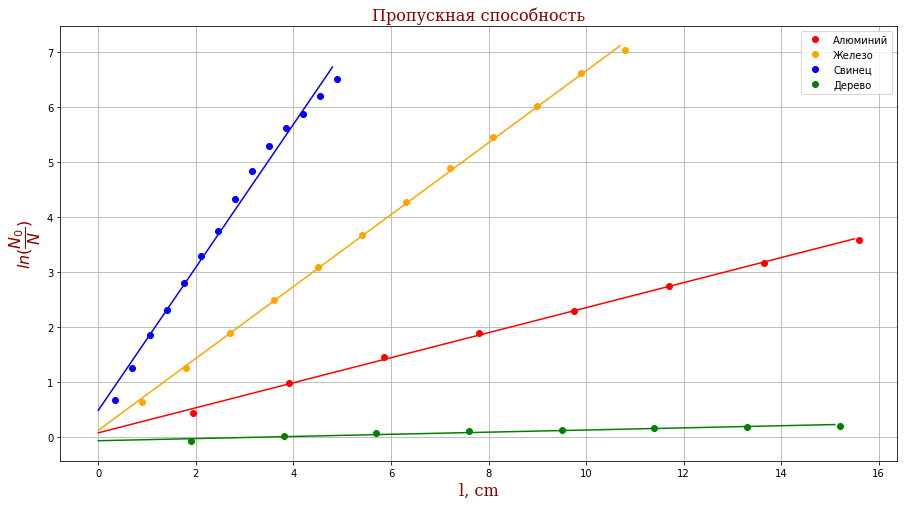

In [49]:
plt.figure(figsize=[15, 8])
plt.grid()
plt.title("Пропускная способность", fontdict=font)
plt.ylabel("$ln(\dfrac{N_0}{N})$", fontdict=font)
plt.xlabel("l, cm", fontdict=font)

Al_line = np.polyfit(Al_l, Al_log, 1)
x = np.arange(start=0, stop=Al_l[len(Al_l) - 1], step=0.1)
plt.plot(Al_l, Al_log, 'or', label='Алюминий')
plt.plot(x, list(map(lambda x_: Al_line[0] * x_ + Al_line[1], x)), 'r')

Fe_line = np.polyfit(Fe_l, Fe_log, 1)
x = np.arange(start=0, stop=Fe_l[len(Fe_l) - 1], step=0.1)
plt.plot(Fe_l, Fe_log, 'o', label='Железо', color='orange')
plt.plot(x, list(map(lambda x_: Fe_line[0] * x_ + Fe_line[1], x)), color='orange')

Pb_line = np.polyfit(Pb_l, Pb_log, 1)
x = np.arange(start=0, stop=Pb_l[len(Pb_l) - 1], step=0.1)
plt.plot(Pb_l, Pb_log, 'o', label='Свинец', color='blue')
plt.plot(x, list(map(lambda x_: Pb_line[0] * x_ + Pb_line[1], x)), color='blue')

Pr_line = np.polyfit(Pr_l, Pr_log, 1)
x = np.arange(start=0, stop=Pr_l[len(Pr_l) - 1], step=0.1)
plt.plot(Pr_l, Pr_log, 'o', label='Дерево', color='green')
plt.plot(x, list(map(lambda x_: Pr_line[0] * x_ + Pr_line[1], x)), color='green')

plt.legend()

mu_Алюминий  =  0.228 +-  \0.004 , E = 1.7% \
mu_Железо  =  0.652 +- 0.006 , E = 0.9% \
mu_Свинец  =  1.301 +- 0.037 , E = 2.8% \
mu_Пробка  =  0.019 +- 0.002 , E = 11.2% \

по таблице в лабнике получаем энергию г кванта 0.5 МэВ для аллюминия и железа и 0.6 МэВ для свинца.
получается среднее значение 0.56МэВ